In [42]:
from keras import backend as K
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam
import numpy as np
import matplotlib.pyplot as plt
import keras

In [43]:
# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# K.set_image_dim_ordering("th")

In [44]:
#define the ConvNet
class LeNet:
    @staticmethod
    def build(input_shape, classes):
        model = Sequential()
        # CONV => RELU => POOL
        model.add(Conv2D(20,3,padding='same',input_shape=input_shape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        # CONV => RELU => POOL
        model.add(Conv2D(50,3,padding='same'))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        # Flatten => RELU layers
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))
 
        # a softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        return model      

In [45]:
X_train.shape

(60000, 28, 28)

In [46]:
y_train.shape

(60000,)

In [47]:
# network and training
NB_EPOCH = 5  # we can increase the number of epoch, it's 5 here for simplicity to our code.
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT=0.2

IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
NB_CLASSES = 10  # number of outputs = number of digits
INPUT_SHAPE = (IMG_ROWS, IMG_COLS,1)

In [48]:
INPUT_SHAPE

(28, 28, 1)

In [49]:
# consider them as float and normalize
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [50]:
# we need a 60K x [1 x 28 x 28] shape as input to the CONVNET
X_train = X_train[:,:,:,np.newaxis]
X_test = X_test[:,:,:,np.newaxis]
print(X_train.shape, 'train samples')
print(X_test.shape, 'test samples')

(60000, 28, 28, 1) train samples
(10000, 28, 28, 1) test samples


In [51]:
# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)

In [52]:
# initialize the optimizer and model
model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER, metrics=["accuracy"])

history = model.fit(X_train, y_train, 
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH, 
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 39s 817us/step - loss: 0.2111 - accuracy: 0.9354 - val_loss: 0.0725 - val_accuracy: 0.9773
Epoch 2/5
48000/48000 [==============================] - 36s 753us/step - loss: 0.0516 - accuracy: 0.9844 - val_loss: 0.0452 - val_accuracy: 0.9862
Epoch 3/5
48000/48000 [==============================] - 36s 748us/step - loss: 0.0358 - accuracy: 0.9886 - val_loss: 0.0426 - val_accuracy: 0.9869
Epoch 4/5
48000/48000 [==============================] - 36s 744us/step - loss: 0.0247 - accuracy: 0.9920 - val_loss: 0.0398 - val_accuracy: 0.9889
Epoch 5/5
48000/48000 [==============================] - 35s 724us/step - loss: 0.0189 - accuracy: 0.9937 - val_loss: 0.0478 - val_accuracy: 0.9869


#### Just 5 epochs of this network gave us the accuracy of 98.69 %, which is quite good.

The predicted class is: 5 
The original class that is given in the test data is: 5
The corresponding image is shown below: 


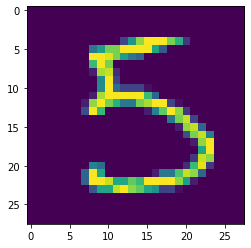

In [87]:
# each element in y_test is an array with all zeroes but one '1' representing the class it belongs to. 
test_sample = 15
print('The predicted class is:', model.predict_classes(X_test)[test_sample], 
      '\nThe original class that is given in the test data is:', np.argmax(y_test[test_sample]))
print('The corresponding image is shown below: ')
plt.imshow(X_test[test_sample].reshape(28, 28), interpolation='nearest')
plt.show()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


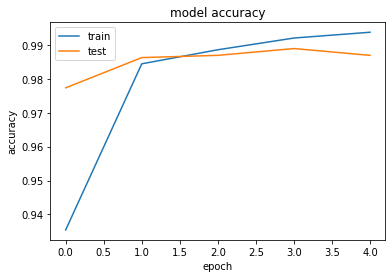

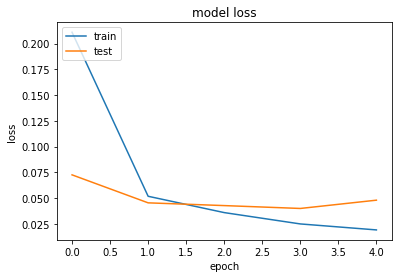

In [88]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [89]:
history.history

{'val_loss': [0.07245128647983075,
  0.04524045567959547,
  0.0425722798279797,
  0.03978469072872152,
  0.0478369071095561],
 'val_accuracy': [0.9773333072662354,
  0.9862499833106995,
  0.9869166612625122,
  0.9889166951179504,
  0.9869166612625122],
 'loss': [0.21107962251454593,
  0.051624513018876314,
  0.03576126612909138,
  0.024738880418241023,
  0.018924066511914132],
 'accuracy': [0.9354375, 0.98441666, 0.9885625, 0.99202085, 0.9937292]}